## Exercise 6: Choosing the best performing model on a dataset

Instructions:

- Use the Dataset File to train your model
- Use the Test File to generate your results
- Use the Sample Submission file to generate the same format
- Use all Regression models

Submit your results to:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview



In [39]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Dataset File

In [40]:
train_data = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/3fd7d51ffd17863598ac3f44eeefc558171a5b73/dataset/house-prices-advanced-regression-techniques/train.csv?raw=true'
df = pd.read_csv(train_data)

## Test File

In [41]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/3fd7d51ffd17863598ac3f44eeefc558171a5b73/dataset/house-prices-advanced-regression-techniques/test.csv?raw=true'
dt=pd.read_csv(test_url)

## What's in the Train Data

In [42]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

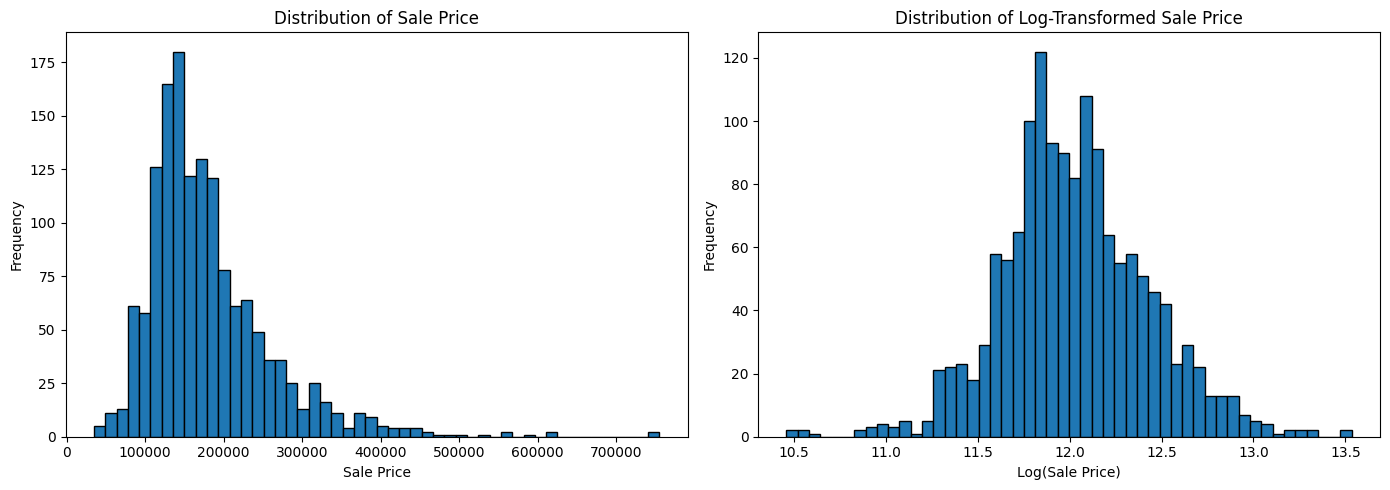

In [45]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df['SalePrice'], bins=50, edgecolor='black')
axes[0].set_xlabel('Sale Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sale Price')

axes[1].hist(np.log1p(df['SalePrice']), bins=50, edgecolor='black')
axes[1].set_xlabel('Log(Sale Price)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Log-Transformed Sale Price')
plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Check the missing values

In [46]:
df.isna().sum().sum()

np.int64(7829)


Missing Values Analysis:

Top 15 features with missing values in training set:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
dtype: int64


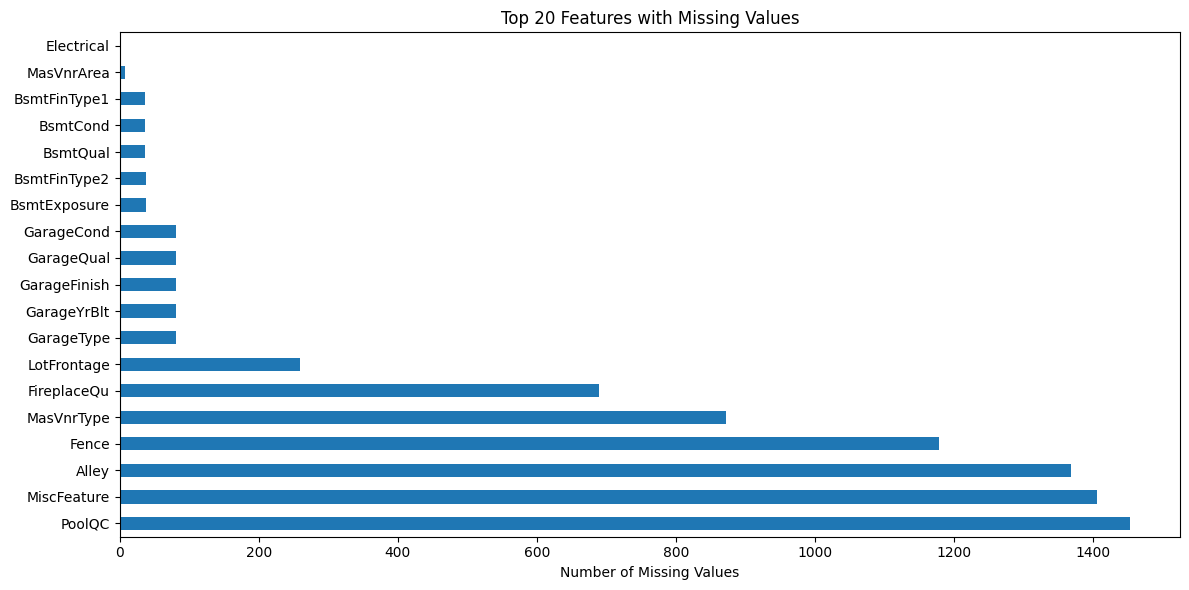

In [47]:
print("\nMissing Values Analysis:")
train_missing = df.isnull().sum()
train_missing = train_missing[train_missing > 0].sort_values(ascending=False)
print(f"\nTop 15 features with missing values in training set:")
print(train_missing.head(15))

# Visualize missing values
if len(train_missing) > 0:
    plt.figure(figsize=(12, 6))
    train_missing.head(20).plot(kind='barh')
    plt.xlabel('Number of Missing Values')
    plt.title('Top 20 Features with Missing Values')
    plt.tight_layout()
    plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()

As we can see, there are a lot of missing data. These data can have a factor when it comes to House Pricing, so we won't drop them or delete them, but instead we can fill the gaps by feature engineering

Considering that the following features are the ones that a house doesn't have. What we can do is fill these missing values with a new category

In [48]:
# Fill missing values with a new category
df["Alley"] = df["Alley"].fillna("NoAlley")

# For LotFrontage, about 17% missing. Fill with median values
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())

# PoolQC, Fence, MiscFeature, FireplaceQu features
df["PoolQC"] = df["PoolQC"].fillna("None")
df["Fence"] = df["Fence"].fillna("None")
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

# Garage and Basement Features
garage_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for col in garage_cols:
    df[col] = df[col].fillna("None")

df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)

basement_col = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in basement_col:
    df[col] = df[col].fillna("None")

# MasVnrType and MasVnrArea:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

# Electrical
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

In [49]:
df.isna().sum().sum()

np.int64(0)

In [50]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


Next is the Test data set. Check the missing values and fill it (For consistent preprocessing later)

In [51]:
dt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [52]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [53]:
dt.isna().sum().sum()

np.int64(7878)

In [54]:
print("\nMissing Values Analysis:")
test_missing = dt.isnull().sum()
test_missing = test_missing[test_missing > 0].sort_values(ascending=False)
print(f"\nTop 15 features with missing values in test set:")
print(test_missing.head(20))


Missing Values Analysis:

Top 15 features with missing values in test set:
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageCond        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
Functional         2
dtype: int64


Fill missing values for test data set

In [55]:
# Fill missing values in test data

# For categorical columns, fill with mode (most frequent value)
categorical_cols = ['MSZoning', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'SaleType']
for col in categorical_cols:
    dt[col] = dt[col].fillna(dt[col].mode()[0])

# For numerical columns, fill with median
numerical_cols = ['BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageCars', 'GarageArea']
for col in numerical_cols:
    dt[col] = dt[col].fillna(dt[col].median())

In [56]:
dt.isna().sum().sum()

np.int64(7856)

In [57]:
dt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Data Preprocessing

In [58]:
target = "SalePrice"

x = df.drop(["Id", target], axis=1)
y = df[target]

x = pd.get_dummies(x)

In [59]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

# Machine Learning Algorithms

In [60]:
score_list = {}

### 1. Train KNN Regressor

In [61]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn_score = knn.score(x_valid, y_valid)
score_list["KNN Regression"] = knn_score
print(f"Score is {knn_score}")

Score is 0.7003276544424496


- Perform cross validation

In [62]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, x, y, cv=5, scoring='neg_mean_absolute_error')

print("KNN Regressor Mean Absolute Error (CV):", -cv_scores.mean())

KNN Regressor Mean Absolute Error (CV): 29714.03506849315


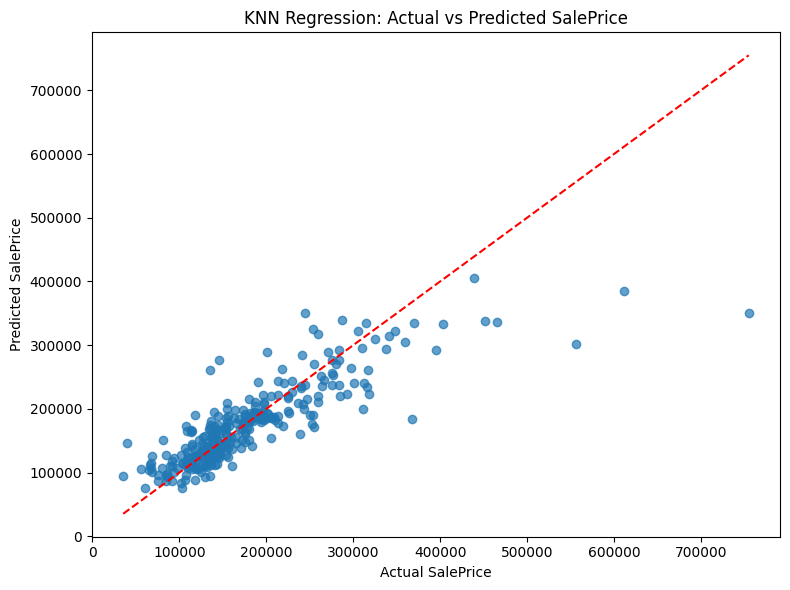

In [63]:
y_true = y_valid
y_pred = knn.predict(x_valid)

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("KNN Regression: Actual vs Predicted SalePrice")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.tight_layout()
plt.show()

### 2. Train SVM Regression

In [64]:
svm = SVR()
svm.fit(x_train, y_train)
svm_score = svm.score(x_valid, y_valid)
score_list["SVR"] = svm_score
print(f"Score is {svm_score}")

Score is -0.02464486841130431


- Perform cross validation

In [65]:
cv_scores = cross_val_score(svm, x, y, cv=5, scoring='neg_mean_absolute_error')

print("SVM Regressor Mean Absolute Error (CV):", -cv_scores.mean())

SVM Regressor Mean Absolute Error (CV): 55545.92387301626


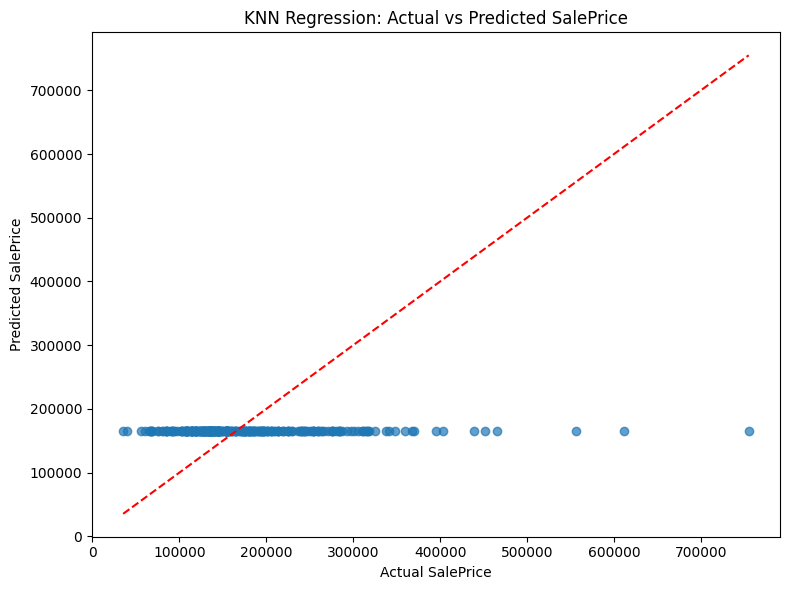

In [66]:
y_true = y_valid
y_pred = svm.predict(x_valid)

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("KNN Regression: Actual vs Predicted SalePrice")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.tight_layout()
plt.show()

### 3. Train Decision Tree Regression

In [67]:
dtc = DecisionTreeRegressor(random_state=42)
dtc.fit(x_train,y_train)
dtc_score = dtc.score(x_valid,y_valid)
score_list["DTC"] = dtc_score
print(f"Score is {dtc_score}")

Score is 0.7549106724678241


- Perform cross validation

In [68]:
cv_scores = cross_val_score(dtc, x, y, cv=5, scoring='neg_mean_absolute_error')

print("Decision Tree Regressor Mean Absolute Error (CV):", -cv_scores.mean())

Decision Tree Regressor Mean Absolute Error (CV): 25944.224657534243


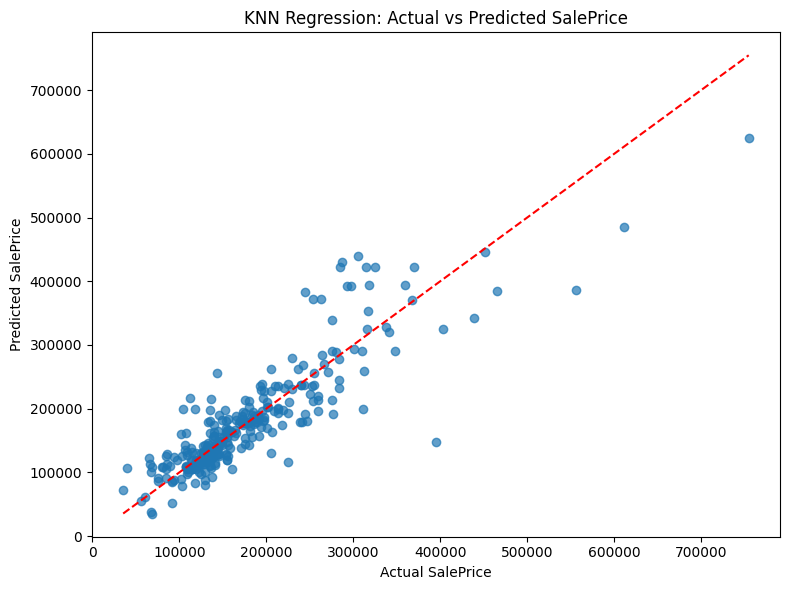

In [69]:
y_true = y_valid
y_pred = dtc.predict(x_valid)

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("KNN Regression: Actual vs Predicted SalePrice")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.tight_layout()
plt.show()

### 4. Train a Random Forest Regression

In [70]:
rfc = RandomForestRegressor(n_estimators=50,random_state=1)
rfc.fit(x_train,y_train)
rfc_score = rfc.score(x_valid,y_valid)
score_list["RFC"]=rfc_score

print(f"Score is {rfc_score}")

Score is 0.8828798419856361


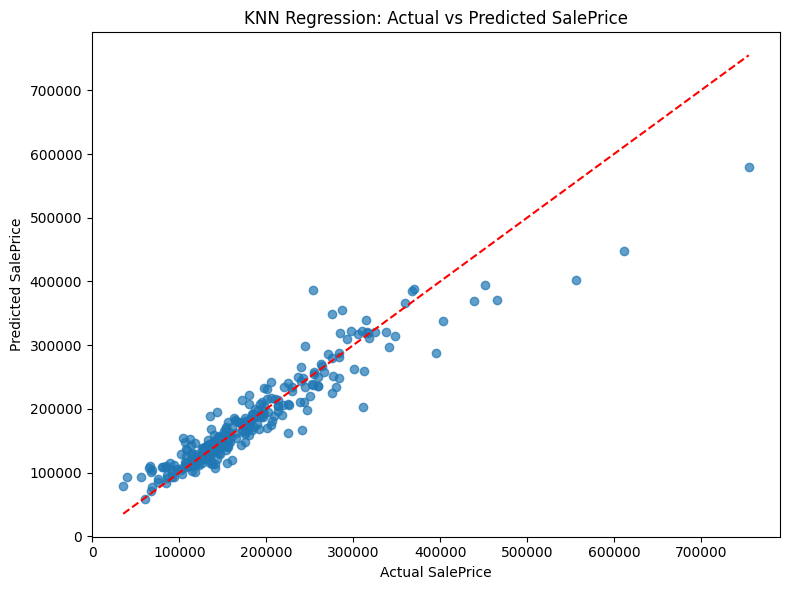

In [71]:
y_true = y_valid
y_pred = rfc.predict(x_valid)

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("KNN Regression: Actual vs Predicted SalePrice")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.tight_layout()
plt.show()

# Result
### 5. Compare all the performance of all regression models

In [72]:
score_list = list(score_list.items())

for alg,score in score_list:
    print(f"{alg} Score is {str(score)[:4]} ")

KNN Regression Score is 0.70 
SVR Score is -0.0 
DTC Score is 0.75 
RFC Score is 0.88 


## Sample Submission File

In [73]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES/blob/3fd7d51ffd17863598ac3f44eeefc558171a5b73/dataset/house-prices-advanced-regression-techniques/sample_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [74]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


## 6. Generate Submission File

Choose the model that has the best performance to generate a submission file.

In [75]:
id = sf.pop('Id')
dt_encoded = pd.get_dummies(dt)

# Align test data columns with training data columns (add missing columns as 0)
dt_encoded = dt_encoded.reindex(columns=x.columns, fill_value=0)

# Use your trained model to predict
y_pred = rfc.predict(dt_encoded)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'Id': id,
    'SalePrice': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
